In [4]:
# Setup imports and short-form names for each of the packages needed for data processing and visualizations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import seaborn.objects as so
from seaborn import axes_style
%matplotlib inline

In [5]:
data = pd.read_csv('results-filtered.csv', dtype={'id': str, 'startTime': 'Int64', 'origin': object, 'destination': object, 'totalPower': float, 'graph': object, 'minimumCapacity': float, 'chargeLevelInterval': float, 'optimizedCost': float, 'optimizedCostDuration': float, 'optimizedDuration': float, 'optimizedDurationFinancialCost': float, 'endTime': 'Int64', 'error': object})
data.drop(['graph'], axis=1, inplace=True)
data.index.name = 'Index'
data.head()

,id,startTime,origin,destination,totalPower,minimumCapacity,chargeLevelInterval,optimizedCost,optimizedCostDuration,optimizedDuration,optimizedDurationFinancialCost,endTime,error
Index,,,,,,,,,,,,,
0,901a46fae66,1685120000000,"{""latitude"":58.4948961905085,""longitude"":15.93...","{""latitude"":58.53150705900772,""longitude"":15.7...",2013.489924,43.0,50.0,0.0,2122.4,2122.4,0.0,1685120000000,NaN
1,934d4d47a03,1685100000000,"{""latitude"":56.65562318302232,""longitude"":15.0...","{""latitude"":56.83923771984071,""longitude"":15.1...",3994.521630,43.0,50.0,0.0,3036.8,3036.8,0.0,1685100000000,NaN
2,013218a0647,1684870000000,"{""latitude"":57.34957577123395,""longitude"":14.6...","{""latitude"":57.33213511150875,""longitude"":15.3...",5282.261753,43.0,50.0,0.0,3828.6,3828.6,0.0,1684870000000,NaN
3,26bd020f53d,1684870000000,"{""latitude"":56.920744776437836,""longitude"":15....","{""latitude"":56.62026305251856,""longitude"":14.9...",5466.995023,43.0,50.0,0.0,4035.6,4035.6,0.0,1684870000000,NaN
4,ed218d23ac4,1685140000000,"{""latitude"":60.27798530517961,""longitude"":13.1...","{""latitude"":59.90993621349289,""longitude"":12.9...",5549.230183,43.0,50.0,0.0,4213.5,4213.5,0.0,1685140000000,NaN


In [ ]:
data['optimized']

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              249 non-null    object 
 1   startTime                       249 non-null    Int64  
 2   origin                          249 non-null    object 
 3   destination                     249 non-null    object 
 4   totalPower                      249 non-null    float64
 5   minimumCapacity                 247 non-null    float64
 6   chargeLevelInterval             247 non-null    float64
 7   optimizedCost                   160 non-null    float64
 8   optimizedCostDuration           160 non-null    float64
 9   optimizedDuration               143 non-null    float64
 10  optimizedDurationFinancialCost  143 non-null    float64
 11  endTime                         154 non-null    Int64  
 12  error                           2 no

## Out of 249 trial routes, 143 were processed successfully

The rest of the routes failed because the server ran out of memory to store the heap. Anecdotally, this always seemed to happen between 48 and 55 million labels on the heap.

In [7]:
data.nunique()

id                                249
startTime                          35
origin                            249
destination                       249
totalPower                        249
minimumCapacity                     1
chargeLevelInterval                 1
optimizedCost                     114
optimizedCostDuration             160
optimizedDuration                 143
optimizedDurationFinancialCost     97
endTime                            32
error                               1
dtype: int64

In [8]:
data.describe()

,startTime,totalPower,minimumCapacity,chargeLevelInterval,optimizedCost,optimizedCostDuration,optimizedDuration,optimizedDurationFinancialCost,endTime
count,249.0,249.000000,247.0,247.0,160.000000,160.000000,143.000000,143.000000,154.0
mean,1684901847389.55835,34786.493322,43.0,50.0,77.595180,16086.380875,14687.474660,83.775063,1684905519480.519531
std,224947576.337272,17928.033708,0.0,0.0,75.001591,8318.262549,7578.210940,84.425180,214149914.528442
min,1684490000000.0,2013.489924,43.0,50.0,0.000000,2122.400000,2122.400000,0.000000,1684490000000.0
25%,1684870000000.0,21095.188830,43.0,50.0,0.000000,9391.575000,8833.200000,0.000000,1684870000000.0
50%,1684930000000.0,33601.041580,43.0,50.0,63.940529,14684.559240,13360.562320,61.544571,1684920000000.0
75%,1685110000000.0,45824.070200,43.0,50.0,121.498577,21498.189485,19398.030315,134.159036,1685110000000.0
max,1685170000000.0,87259.953320,43.0,50.0,319.100268,37951.907250,33709.708050,315.179604,1685170000000.0


In [41]:
successful = data[data['optimizedDuration'].notnull()]
successful.describe()

,startTime,totalPower,minimumCapacity,chargeLevelInterval,optimizedCost,optimizedCostDuration,optimizedDuration,optimizedDurationFinancialCost,endTime
count,143.0,143.000000,143.0,143.0,143.000000,143.000000,143.000000,143.000000,143.0
mean,1684914125874.125977,24758.047079,43.0,50.0,71.173738,15411.057919,14687.474660,83.775063,1684914755244.755127
std,205468645.602717,12096.935100,0.0,0.0,71.209087,8164.739543,7578.210940,84.425180,205788870.912187
min,1684490000000.0,2013.489924,43.0,50.0,0.000000,2122.400000,2122.400000,0.000000,1684490000000.0
25%,1684870000000.0,16046.227380,43.0,50.0,0.000000,8833.200000,8833.200000,0.000000,1684870000000.0
50%,1684920000000.0,24497.966680,43.0,50.0,54.481312,13821.712110,13360.562320,61.544571,1684930000000.0
75%,1685105000000.0,34419.564255,43.0,50.0,117.953942,20909.182220,19398.030315,134.159036,1685110000000.0
max,1685170000000.0,51990.844220,43.0,50.0,281.722779,35021.228840,33709.708050,315.179604,1685170000000.0


In [46]:
unsuccesful = data[data['optimizedDuration'].isnull()]
unsuccesful.describe()

,startTime,totalPower,minimumCapacity,chargeLevelInterval,optimizedCost,optimizedCostDuration,optimizedDuration,optimizedDurationFinancialCost,endTime
count,106.0,106.000000,104.0,104.0,17.000000,17.000000,0.0,0.0,11.0
mean,1684885283018.86792,48315.434951,43.0,50.0,131.610847,21767.038679,NaN,NaN,1684785454545.45459
std,248876360.763714,15475.999411,0.0,0.0,86.194310,7590.366531,NaN,NaN,288491373.748458
min,1684490000000.0,19686.404740,43.0,50.0,23.024323,10720.980470,NaN,NaN,1684490000000.0
25%,1684560000000.0,36918.427598,43.0,50.0,66.173188,17090.345580,NaN,NaN,1684505000000.0
50%,1684935000000.0,48052.207275,43.0,50.0,106.238241,19515.966460,NaN,NaN,1684870000000.0
75%,1685120000000.0,58793.844810,43.0,50.0,184.101790,24475.323350,NaN,NaN,1685015000000.0
max,1685170000000.0,87259.953320,43.0,50.0,319.100268,37951.907250,NaN,NaN,1685170000000.0


### The cost when optimizing for duration is never less than the cost when optimizing for cost

That is, the optimization is working.

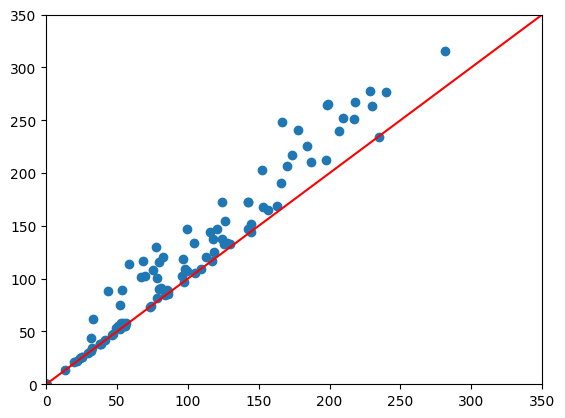

In [10]:
x=successful['optimizedCost']
y=successful['optimizedDurationFinancialCost']
fig, ax = plt.subplots()
plt.xlim(0, 350)
plt.ylim(0, 350)
ax.plot([0, 1], [0, 1], color='red', transform=ax.transAxes)
ax.scatter(x, y)

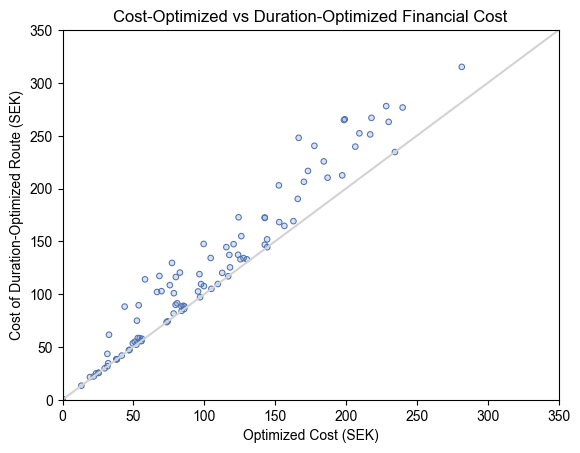

In [37]:
p = so.Plot(successful, x=successful['optimizedCost'], y=successful['optimizedDurationFinancialCost']).theme({**axes_style("whitegrid"), "grid.linestyle": ":"}).add(so.Dots()).label(x="Optimized Cost (SEK)", y="Cost of Duration-Optimized Route (SEK)", color=str.capitalize, title="Cost-Optimized vs Duration-Optimized Financial Cost")

fig, ax = plt.subplots()
plt.xlim(0, 350)
plt.ylim(0, 350)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, color='lightgrey')

p.on(ax).show()

In [13]:
data.loc[(data['optimizedDurationFinancialCost'] < data['optimizedCost'])]

,id,startTime,origin,destination,totalPower,minimumCapacity,chargeLevelInterval,optimizedCost,optimizedCostDuration,optimizedDuration,optimizedDurationFinancialCost,endTime,error
Index,,,,,,,,,,,,,


### Checking the opposite way, the duration when optimizing for duration is never more than the duration when optimizing for cost

Another confirmation that the optimization is working.

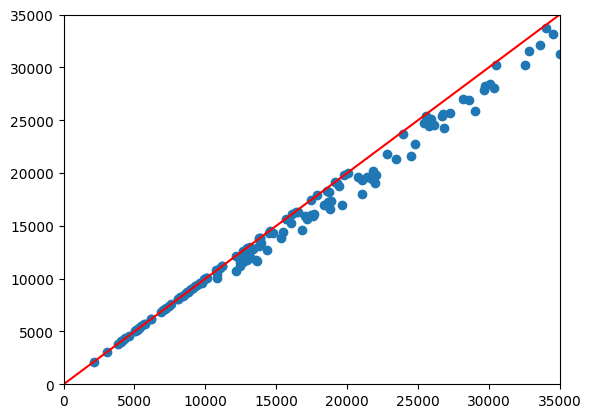

In [14]:
x=successful['optimizedCostDuration']
y=successful['optimizedDuration']
fig, ax = plt.subplots()
plt.xlim(0, 35000)
plt.ylim(0, 35000)
ax.plot([0, 1], [0, 1], color='red', transform=ax.transAxes)
ax.scatter(x, y)

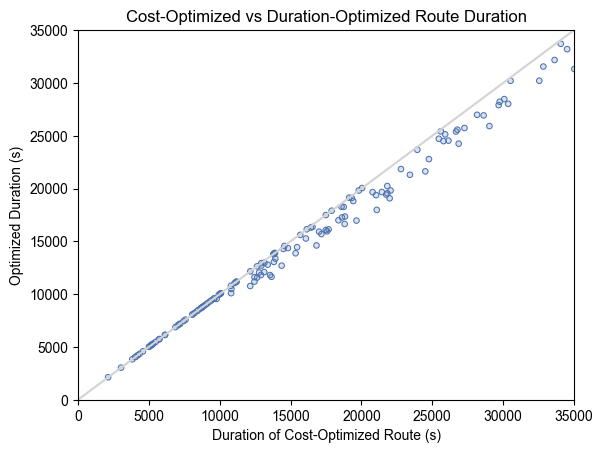

In [40]:
p = so.Plot(successful, x=successful['optimizedCostDuration'], y=successful['optimizedDuration']).theme({**axes_style("whitegrid"), "grid.linestyle": ":"}).add(so.Dots()).label(x="Duration of Cost-Optimized Route (s)", y="Optimized Duration (s)", color=str.capitalize, title="Cost-Optimized vs Duration-Optimized Route Duration")

fig, ax = plt.subplots()
plt.xlim(0, 35000)
plt.ylim(0, 35000)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, color='lightgrey')

p.on(ax).show()

In [15]:
data.loc[(data['optimizedDuration'] > data['optimizedCostDuration'])]

,id,startTime,origin,destination,totalPower,minimumCapacity,chargeLevelInterval,optimizedCost,optimizedCostDuration,optimizedDuration,optimizedDurationFinancialCost,endTime,error
Index,,,,,,,,,,,,,


### Cost goes up on longer trips

Text(0, 0.5, 'Cost (SEK)')

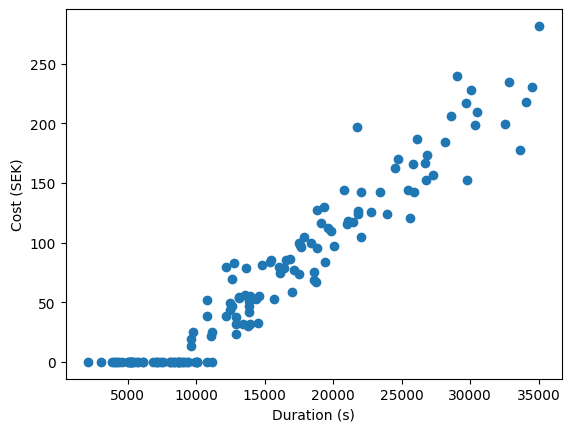

In [16]:
plt.scatter(successful['optimizedCostDuration'], successful['optimizedCost'])
plt.xlabel('Duration (s)')
plt.ylabel('Cost (SEK)')

Text(0, 0.5, 'Cost (SEK)')

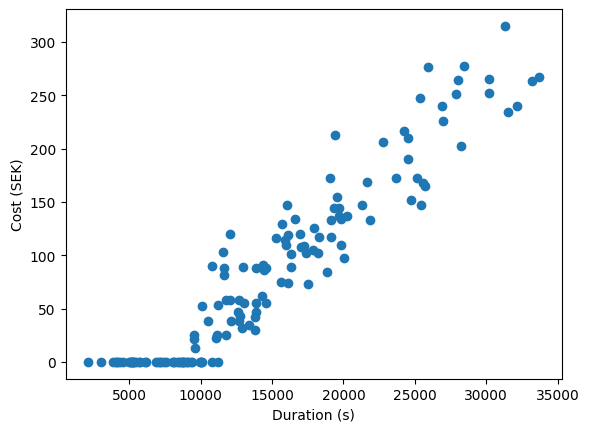

In [17]:
plt.scatter(successful['optimizedDuration'], successful['optimizedDurationFinancialCost'])
plt.xlabel('Duration (s)')
plt.ylabel('Cost (SEK)')

Text(0, 0.5, 'Optimizing for Duration')

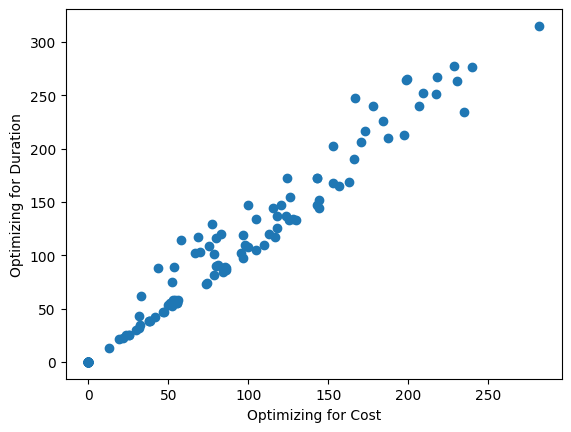

In [18]:
plt.scatter(successful['optimizedCost'], successful['optimizedDurationFinancialCost'])
plt.xlabel('Optimizing for Cost')
plt.ylabel('Optimizing for Duration')

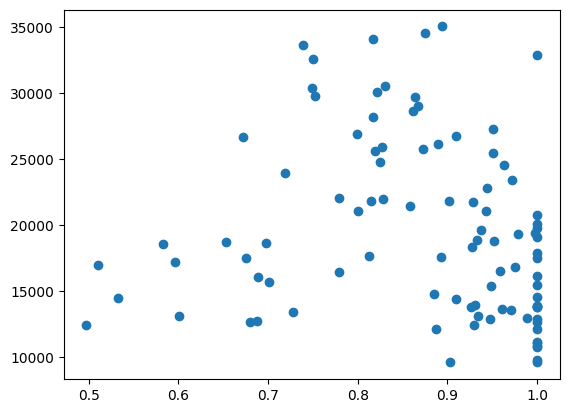

In [19]:
# Ratio of optimizedCost to optimizedDurationFinancialCost
plt.scatter(successful['optimizedCost']/successful['optimizedDurationFinancialCost'], successful['optimizedCostDuration'])

In [20]:
# Number of routes with an optimized cost of zero
zeroes = successful.loc[(successful['optimizedCost'] == 0)]
zeroes.describe()

,startTime,totalPower,minimumCapacity,chargeLevelInterval,optimizedCost,optimizedCostDuration,optimizedDuration,optimizedDurationFinancialCost,endTime
count,47.0,47.000000,47.0,47.0,47.0,47.000000,47.000000,47.0,47.0
mean,1684892765957.446777,11439.377435,43.0,50.0,0.0,6979.036170,6979.036170,0.0,1684892978723.404297
std,210183171.953496,4627.094582,0.0,0.0,0.0,2252.368237,2252.368237,0.0,210216398.789614
min,1684490000000.0,2013.489924,43.0,50.0,0.0,2122.400000,2122.400000,0.0,1684490000000.0
25%,1684870000000.0,7581.777579,43.0,50.0,0.0,5179.650000,5179.650000,0.0,1684870000000.0
50%,1684910000000.0,11013.681140,43.0,50.0,0.0,7137.900000,7137.900000,0.0,1684910000000.0
75%,1685105000000.0,15748.258730,43.0,50.0,0.0,8760.650000,8760.650000,0.0,1685105000000.0
max,1685160000000.0,18865.838530,43.0,50.0,0.0,11187.300000,11187.300000,0.0,1685160000000.0


In [21]:
# Number of routes with an optimized cost more than zero
nonzeroes = successful.loc[(successful['optimizedCost'] != 0)]
nonzeroes.describe()

,startTime,totalPower,minimumCapacity,chargeLevelInterval,optimizedCost,optimizedCostDuration,optimizedDuration,optimizedDurationFinancialCost,endTime
count,96.0,96.000000,96.0,96.0,96.000000,96.000000,96.000000,96.000000,96.0
mean,1684924583333.333252,31278.645759,43.0,50.0,106.019213,19539.235234,18461.397670,124.789938,1684925416666.666748
std,203412552.873874,8811.412371,0.0,0.0,62.018028,6692.577621,6292.494937,74.039063,203846777.68346
min,1684510000000.0,18009.222000,43.0,50.0,13.300928,9602.824872,9544.639422,13.300928,1684510000000.0
25%,1684870000000.0,24352.531765,43.0,50.0,54.297526,13821.164913,13283.957973,60.755685,1684870000000.0
50%,1684930000000.0,30475.017070,43.0,50.0,96.132755,18484.445075,17128.814860,111.788895,1684930000000.0
75%,1685102500000.0,37840.979377,43.0,50.0,144.383229,24571.305993,23006.651205,168.413583,1685110000000.0
max,1685170000000.0,51990.844220,43.0,50.0,281.722779,35021.228840,33709.708050,315.179604,1685170000000.0


In [22]:
# The average, median, minimum and maximum values for the ratio of optimizedCost to optimizedDurationFinancialCost
stats = successful['optimizedCost']/successful['optimizedDurationFinancialCost']
stats.describe()



count    96.000000
mean      0.871982
std       0.130461
min       0.497160
25%       0.809451
50%       0.909285
75%       0.991431
max       1.000000
dtype: float64

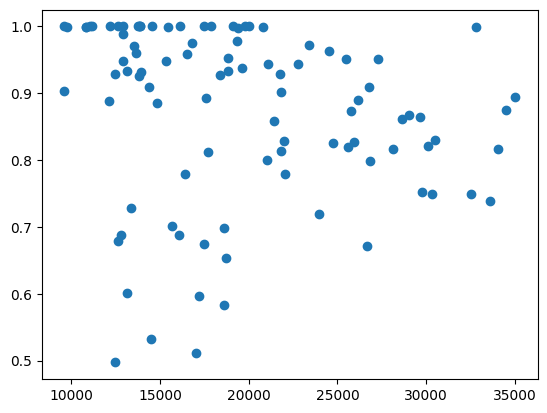

In [23]:
# Ratio of optimizedCost to optimizedDurationFinancialCost
plt.scatter(successful['optimizedCostDuration'], successful['optimizedCost']/successful['optimizedDurationFinancialCost'])

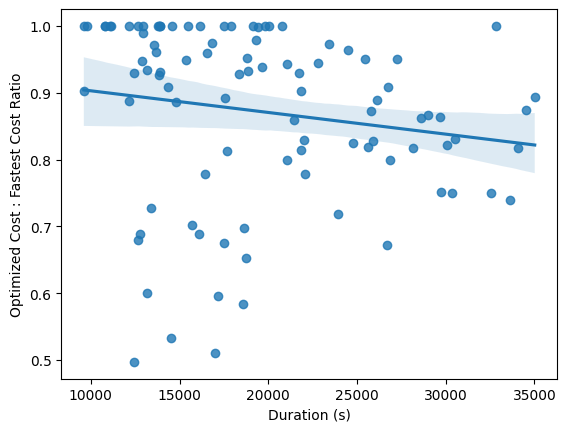

In [24]:
x = successful['optimizedCostDuration']
y = successful['optimizedCost']/successful['optimizedDurationFinancialCost']
ax = sns.regplot(x=x, y=y)
ax.set(xlabel='Duration (s)', ylabel='Optimized Cost : Fastest Cost Ratio')
plt.show()

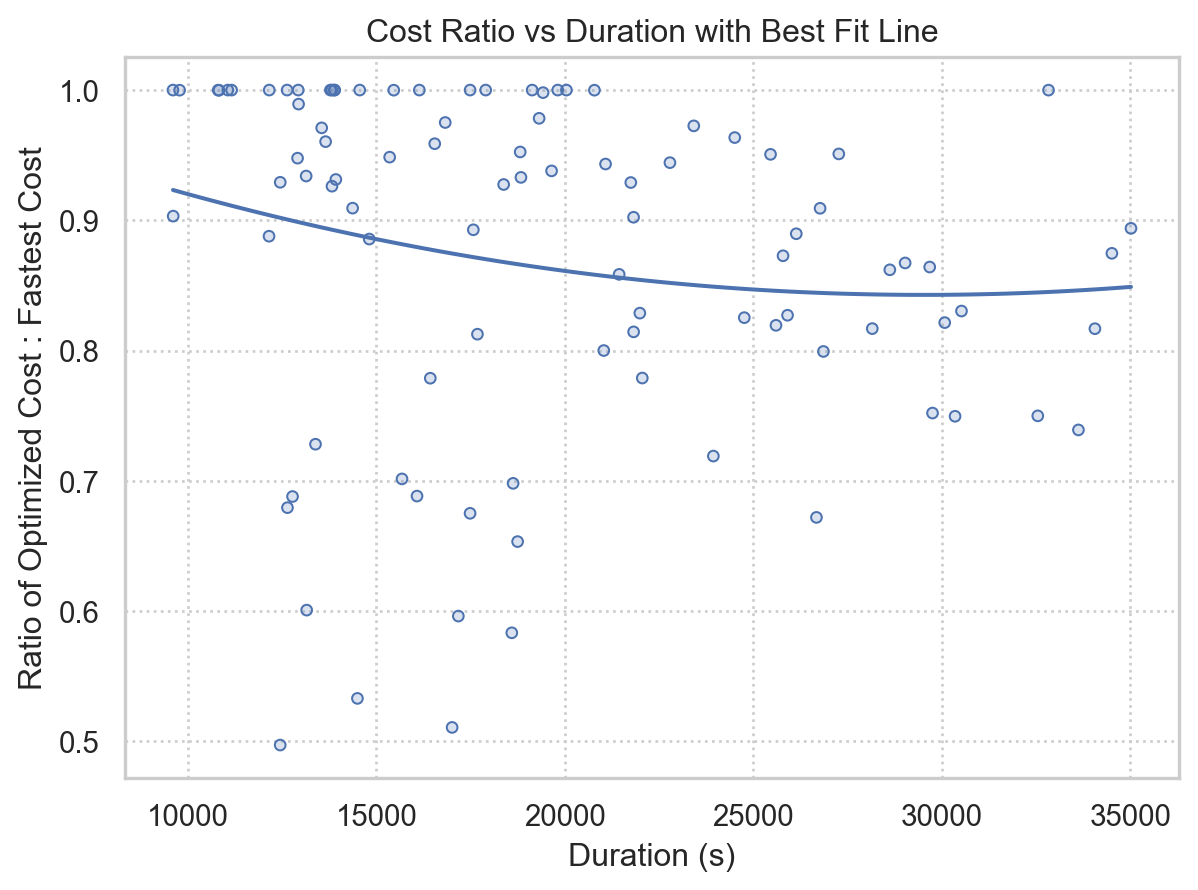

In [25]:

(
    so.Plot(successful, x=x, y=y).theme({**axes_style("whitegrid"), "grid.linestyle": ":"})
    .add(so.Dots())
    .add(so.Line(), so.PolyFit())
    .label(
        x="Duration (s)", y="Ratio of Optimized Cost : Fastest Cost",
        color=str.capitalize,
        title="Cost Ratio vs Duration with Best Fit Line",
    )
)

In [42]:
# routes where the costs were equal
equal = successful.loc[(successful['optimizedCost'] == successful['optimizedDurationFinancialCost'])]
equal.describe()

,startTime,totalPower,minimumCapacity,chargeLevelInterval,optimizedCost,optimizedCostDuration,optimizedDuration,optimizedDurationFinancialCost,endTime
count,64.0,64.000000,64.0,64.0,64.000000,64.000000,64.000000,64.000000,64.0
mean,1684929687500.0,14739.190701,43.0,50.0,15.373322,9031.169198,9031.169198,15.373322,1684930312500.0
std,199347895.231761,7256.401666,0.0,0.0,30.581362,4256.727117,4256.727117,30.581362,199562766.113941
min,1684490000000.0,2013.489924,43.0,50.0,0.000000,2122.400000,2122.400000,0.000000,1684490000000.0
25%,1684880000000.0,8205.649380,43.0,50.0,0.000000,5434.050000,5434.050000,0.000000,1684880000000.0
50%,1684920000000.0,15046.186785,43.0,50.0,0.000000,8551.850000,8551.850000,0.000000,1684925000000.0
75%,1685112500000.0,18510.686245,43.0,50.0,15.484914,11083.083882,11083.083882,15.484914,1685112500000.0
max,1685170000000.0,33037.528930,43.0,50.0,116.877103,20041.957750,20041.957750,116.877103,1685170000000.0


In [43]:
positiveCost = successful[successful['optimizedCost'] > 0]
positiveCost.describe()

,startTime,totalPower,minimumCapacity,chargeLevelInterval,optimizedCost,optimizedCostDuration,optimizedDuration,optimizedDurationFinancialCost,endTime
count,96.0,96.000000,96.0,96.0,96.000000,96.000000,96.000000,96.000000,96.0
mean,1684924583333.333252,31278.645759,43.0,50.0,106.019213,19539.235234,18461.397670,124.789938,1684925416666.666748
std,203412552.873874,8811.412371,0.0,0.0,62.018028,6692.577621,6292.494937,74.039063,203846777.68346
min,1684510000000.0,18009.222000,43.0,50.0,13.300928,9602.824872,9544.639422,13.300928,1684510000000.0
25%,1684870000000.0,24352.531765,43.0,50.0,54.297526,13821.164913,13283.957973,60.755685,1684870000000.0
50%,1684930000000.0,30475.017070,43.0,50.0,96.132755,18484.445075,17128.814860,111.788895,1684930000000.0
75%,1685102500000.0,37840.979377,43.0,50.0,144.383229,24571.305993,23006.651205,168.413583,1685110000000.0
max,1685170000000.0,51990.844220,43.0,50.0,281.722779,35021.228840,33709.708050,315.179604,1685170000000.0


In [45]:
posAndEqual = positiveCost.loc[(positiveCost['optimizedCost'] == positiveCost['optimizedDurationFinancialCost'])]
posAndEqual.describe()

,startTime,totalPower,minimumCapacity,chargeLevelInterval,optimizedCost,optimizedCostDuration,optimizedDuration,optimizedDurationFinancialCost,endTime
count,17.0,17.000000,17.0,17.0,17.000000,17.000000,17.000000,17.000000,17.0
mean,1685031764705.882324,23862.203849,43.0,50.0,57.876035,14704.713452,14704.713452,57.876035,1685033529411.764648
std,119960164.956833,5035.849350,0.0,0.0,32.692445,3192.116418,3192.116418,32.692445,119788416.409444
min,1684870000000.0,18054.525480,43.0,50.0,13.300928,9602.824872,9602.824872,13.300928,1684870000000.0
25%,1684930000000.0,19845.566210,43.0,50.0,31.697522,12631.046440,12631.046440,31.697522,1684930000000.0
50%,1685090000000.0,22275.840720,43.0,50.0,47.271531,13881.234850,13881.234850,47.271531,1685090000000.0
75%,1685150000000.0,27140.481680,43.0,50.0,74.183624,17486.008290,17486.008290,74.183624,1685150000000.0
max,1685170000000.0,33037.528930,43.0,50.0,116.877103,20041.957750,20041.957750,116.877103,1685170000000.0


In [26]:
# what is the price per second of savings between the optimized cost and the fastest cost?
successful['optimizedCostDuration'].describe()



count      143.000000
mean     15411.057919
std       8164.739543
min       2122.400000
25%       8833.200000
50%      13821.712110
75%      20909.182220
max      35021.228840
Name: optimizedCostDuration, dtype: float64

In [27]:
# which routes were able to complete the financial optimization but not the duration optimization?

In [28]:
# what is the increase in duration for a 1% decrease in cost?


In [29]:
# Map of completed routes
# Color code by percentage cost savings when optimizing for cost vs duration

In [30]:
# Map of failed routes